<a href="https://colab.research.google.com/github/Subodh564/Covid--19-Dataset-Analysis/blob/main/Bike_Rental_Counting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Time Line of the project:**



*   Importing libaries and datasets

*   Data Analyst and Processing

*   Feature Enginerring
*   Model Building using ML
*   Model Building and Prediction using H2O Auto ML






Importing Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data =pd.read_csv("/content/sample_data/day.csv")

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
data.shape

(731, 16)

In [5]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Converting the columns for better understanding

In [6]:
data.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'Year','mnth':'Month','weathersit':'Weather_condition','hum':'Humidity','cnt':'Total_count'},inplace=True)

In [7]:
data.head()

,rec_id,datetime,season,Year,Month,holiday,weekday,workingday,Weather_condition,temp,atemp,Humidity,windspeed,casual,registered,Total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
data.columns

Index(['rec_id', 'datetime', 'season', 'Year', 'Month', 'holiday', 'weekday',
       'workingday', 'Weather_condition', 'temp', 'atemp', 'Humidity',
       'windspeed', 'casual', 'registered', 'Total_count'],
      dtype='object')

Converting data types of variables to the siginificent category

In [9]:
data['datetime']=pd.to_datetime(data.datetime)
data['season']=data.season.astype('category')
data['Year']=data.Year.astype('category')
data['Month']=data.Month.astype('category')
data['holiday']=data.holiday.astype('category')
data['weekday']=data.weekday.astype('category')
data['workingday']=data.workingday.astype('category')
data['Weather_condition']=data.Weather_condition.astype('category')

In [10]:
data.dtypes

rec_id                        int64
datetime             datetime64[ns]
season                     category
Year                       category
Month                      category
holiday                    category
weekday                    category
workingday                 category
Weather_condition          category
temp                        float64
atemp                       float64
Humidity                    float64
windspeed                   float64
casual                        int64
registered                    int64
Total_count                   int64
dtype: object

In [11]:
data.describe()

,rec_id,temp,atemp,Humidity,windspeed,casual,registered,Total_count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Handling missing value

In [12]:
data.isnull().sum()

rec_id               0
datetime             0
season               0
Year                 0
Month                0
holiday              0
weekday              0
workingday           0
Weather_condition    0
temp                 0
atemp                0
Humidity             0
windspeed            0
casual               0
registered           0
Total_count          0
dtype: int64

See how the different months and seasonal affects the rental counts

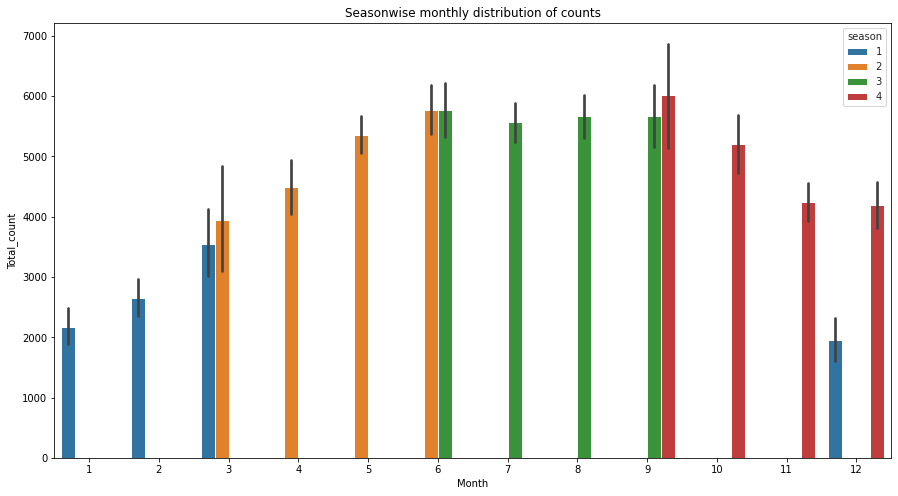

In [13]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
# Bar plot for seasonwise distribution of counts
sns.barplot(x='Month',y='Total_count',data=data[['Month','Total_count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()


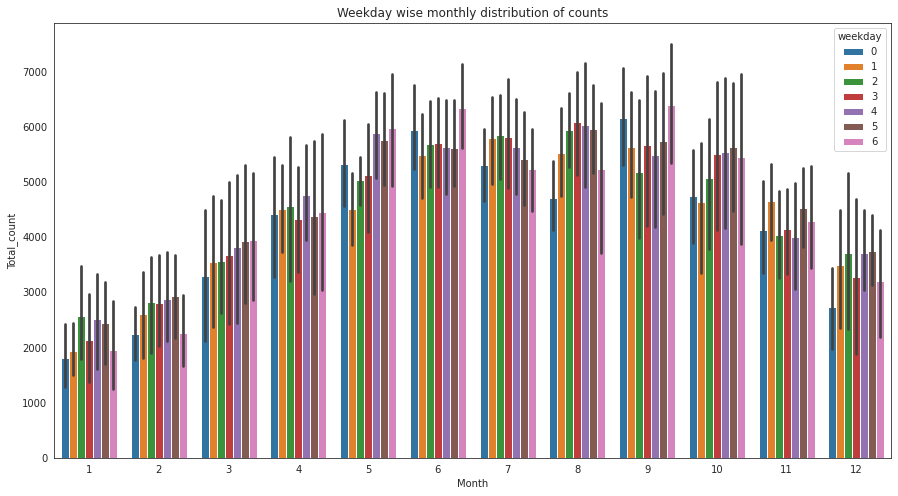

In [14]:
# Barplot for weekday wise monthly distribution of counts
fig,a1=plt.subplots(figsize=(15,8))
sns.barplot(x='Month',y='Total_count',data=data[['Month','Total_count','weekday']],hue='weekday',ax=a1)
a1.set_title("Weekday wise monthly distribution of counts")
plt.show()

<bound method Artist.set of <matplotlib.axes._subplots.AxesSubplot object at 0x7fc9b77c3050>>

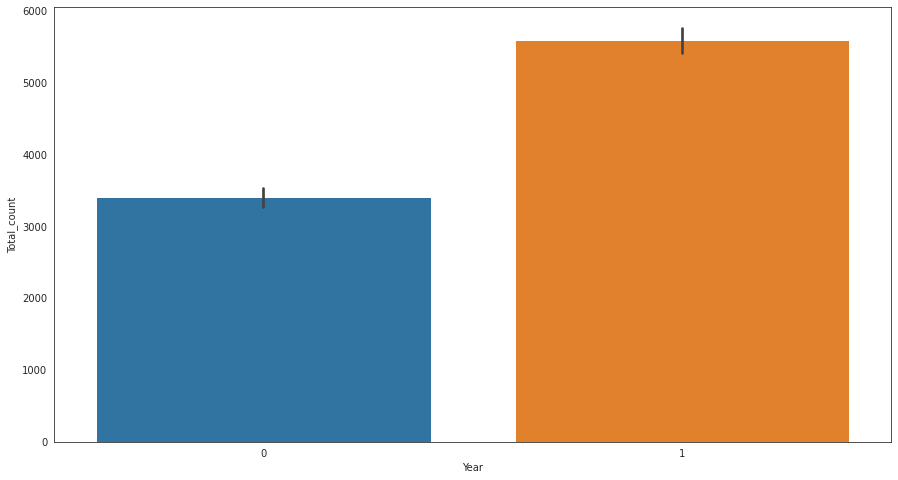

In [15]:
fig,ax=plt.subplots(figsize=(15,8))
# Violin plot for yearly distribution of counts
sns.barplot(x='Year',y="Total_count",data=data[["Year","Total_count"]])
ax.set

# Data Preporcessing

In [23]:
# Categorical attributes
cat_attributes = ['season','holiday','workingday','Weather_condition','Year']
# Numerical attributes
num_attributes = ['temp','windspeed','Humidity','Month','weekday']

# One-Hot Encoding

In [32]:
encoded_df = pd.get_dummies(data,columns=cat_attributes)
print("shape of transformed dataframe:",encoded_df.shape)
encoded_df.head()

shape of transformed dataframe: (731, 24)


,rec_id,datetime,Month,weekday,temp,atemp,Humidity,windspeed,casual,registered,...,season_4,holiday_0,holiday_1,workingday_0,workingday_1,Weather_condition_1,Weather_condition_2,Weather_condition_3,Year_0,Year_1
0,1,2011-01-01,1,6,0.344167,0.363625,0.805833,0.160446,331,654,...,0,1,0,1,0,0,1,0,1,0
1,2,2011-01-02,1,0,0.363478,0.353739,0.696087,0.248539,131,670,...,0,1,0,1,0,0,1,0,1,0
2,3,2011-01-03,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,...,0,1,0,0,1,1,0,0,1,0
3,4,2011-01-04,1,2,0.200000,0.212122,0.590435,0.160296,108,1454,...,0,1,0,0,1,1,0,0,1,0
4,5,2011-01-05,1,3,0.226957,0.229270,0.436957,0.186900,82,1518,...,0,1,0,0,1,1,0,0,1,0


In [33]:
encoded_df=data.drop('datetime',axis=1)
encoded_df

,rec_id,season,Year,Month,holiday,weekday,workingday,Weather_condition,temp,atemp,Humidity,windspeed,casual,registered,Total_count
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [34]:
encoded_df

,rec_id,season,Year,Month,holiday,weekday,workingday,Weather_condition,temp,atemp,Humidity,windspeed,casual,registered,Total_count
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [38]:
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

In [39]:
x=encoded_df.iloc[:,0:-1] ## Independent Features
y= encoded_df.iloc[:,-1] # Dependent variables

In [41]:
encoded_df

,rec_id,season,Year,Month,holiday,weekday,workingday,Weather_condition,temp,atemp,Humidity,windspeed,casual,registered,Total_count
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [44]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.3,random_state=0)

In [45]:
x_train

,rec_id,season,Year,Month,holiday,weekday,workingday,Weather_condition,temp,atemp,Humidity,windspeed,casual,registered
524,525,2,1,6,0,5,1,1,0.649167,0.597862,0.467917,0.175383,1488,6248
12,13,1,0,1,0,4,1,1,0.165000,0.150883,0.470417,0.301000,38,1368
161,162,2,0,6,0,6,0,1,0.725000,0.678038,0.654583,0.154850,1729,3237
556,557,3,1,7,0,2,1,2,0.720833,0.664796,0.667500,0.151737,954,5336
502,503,2,1,5,0,4,1,1,0.593333,0.572613,0.520000,0.229475,1242,6142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,708,4,1,12,0,6,0,2,0.381667,0.389508,0.911250,0.101379,1153,4429
192,193,3,0,7,0,2,1,1,0.794167,0.739275,0.559167,0.200254,662,3596
629,630,3,1,9,0,5,1,1,0.599167,0.571971,0.668750,0.154229,1250,6917
559,560,3,1,7,0,5,1,2,0.731667,0.667933,0.485833,0.080850,1511,5988


In [46]:
y_train

524    7736
12     1406
161    4966
556    6290
502    7384
       ... 
707    5582
192    4258
629    8167
559    7499
684    5445
Name: Total_count, Length: 511, dtype: int64

Building Model
# We will using the following models in our project


1.   Linear Regression
2.   Random Forest Regressor



# Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [48]:
linear_regression = LinearRegression()

In [49]:
linear_regression.fit(x_train,y_train)

LinearRegression()

In [50]:
pred =linear_regression.predict(x_test)


In [51]:
lr  =linear_regression.score(x_train,y_train)
print("Acurracyof the model:",lr);
print("Modelcoefficients:",linear_regression.coef_)
print('model intercept value:',linear_regression.intercept_)

Acurracyof the model: 1.0
Modelcoefficients: [ 1.60860027e-14  4.19220214e-13 -5.19785918e-12 -4.34742086e-13
 -4.34163262e-13 -8.70627219e-15 -8.47722274e-13  9.81032734e-14
  1.39732657e-12  9.38341937e-13 -8.65112511e-13 -2.33857629e-12
  1.00000000e+00  1.00000000e+00]
model intercept value: -3.637978807091713e-12


In [52]:
import math
#Root mean square error
rmse =math.sqrt(metrics.mean_absolute_error(y_test,pred))
# Mean absolute error
mae =metrics.mean_squared_error(y_test,pred)
print("Root mean square error:",rmse)
print('Mean absolute error',mae)

Root mean square error: 1.2963402967071559e-06
Mean absolute error 4.37430497510464e-24


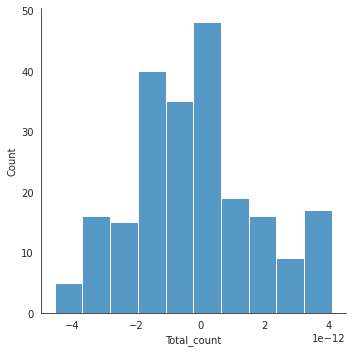

In [56]:
sns.displot(y_test-pred)

# Random Forest Reressor

In [57]:
from sklearn.ensemble import  RandomForestRegressor

In [58]:
rf=RandomForestRegressor(n_estimators=200)
rf.fit(x_train,y_train)
rf_score=rf.score(x_train,y_train)
print("Accuracy of the model is:",rf_score)
rf_pred=rf.predict(x_test)

Accuracy of the model is: 0.9993365387276976


In [59]:
# Root mean square error
rmse = math.sqrt(metrics.mean_squared_error(y_test,rf_pred))
print("Root mean square error",rmse)
#Root absolute error
mae=metrics.mean_absolute_error(y_test,rf_pred)
print("Mean absolute error",mae)

Root mean square error 138.56774111545917
Mean absolute error 83.41906818181822


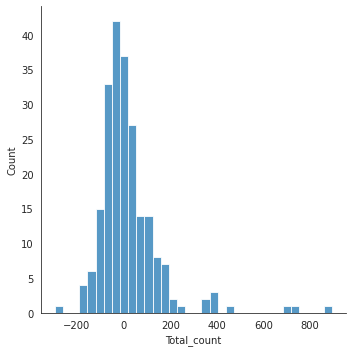

In [61]:
sns.displot(y_test-rf_pred)

# Using Auto ML

#### H2O is a fully open-source,distributed machine learning platform with linear scalability.H2O supports the most widely used stastical and machine learning algorithms , including gradient boosted amchines , generalized linear models, deep learning and many more

In [63]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.4 MB 61 kB/s 
  Created wheel for h2o: filename=h2o-3.38.0.2-py2.py3-none-any.whl size=177521195 sha256=55b670668a5ee7249482862190a8eae1bdf31364311887126595ddd53f40f44c
  Stored in directory: /root/.cache/pip/wheels/e4/ef/ab/a9b2e452e18b3dfea0b6114bc57c3b9e8b0e464eb2d03230e1
Successfully built h2o


In [65]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G') # The h2o.init() makes sure that no piror instanceof h2o is runing.


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpfwhhwodu
  JVM stdout: /tmp/tmpfwhhwodu/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpfwhhwodu/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_4wpfk5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [66]:
data = h2o.import_file('/content/sample_data/day.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [67]:
data.head()

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01 00:00:00,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02 00:00:00,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03 00:00:00,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04 00:00:00,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05 00:00:00,1,0,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,82,1518,1600
6,2011-01-06 00:00:00,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606
7,2011-01-07 00:00:00,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
8,2011-01-08 00:00:00,1,0,1,0,6,0,2,0.165,0.162254,0.535833,0.266804,68,891,959
9,2011-01-09 00:00:00,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.36195,54,768,822
10,2011-01-10 00:00:00,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [68]:
data_train,data_test=data.split_frame(ratios=[.8])

In [69]:
data_train

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01 00:00:00,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,2011-01-03 00:00:00,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04 00:00:00,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05 00:00:00,1,0,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,82,1518,1600
6,2011-01-06 00:00:00,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606
8,2011-01-08 00:00:00,1,0,1,0,6,0,2,0.165,0.162254,0.535833,0.266804,68,891,959
9,2011-01-09 00:00:00,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.36195,54,768,822
10,2011-01-10 00:00:00,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321
11,2011-01-11 00:00:00,1,0,1,0,2,1,2,0.169091,0.191464,0.686364,0.122132,43,1220,1263
12,2011-01-12 00:00:00,1,0,1,0,3,1,1,0.172727,0.160473,0.599545,0.304627,25,1137,1162


#Splitting Data

In [72]:
y='cnt' ## Dependent variables
x=data.columns ## Independent variables
x.remove(y)
x.remove('casual')
x.remove('registered')

# Defining the model

In [73]:
aml = H2OAutoML(max_runtime_secs=300,max_models=10,seed=10,verbosity='info',nfolds=2)

# Fitting the models

In [76]:
aml.train(x=x,y=y,training_frame=data_train)

AutoML progress: |
11:21:48.71: Project: AutoML_1_20221117_112148
11:21:48.71: Setting stopping tolerance adaptively based on the training frame: 0.04173919355648411
11:21:48.72: Build control seed: 10
11:21:48.73: training frame: Frame key: AutoML_1_20221117_112148_training_py_3_sid_aa1c    cols: 16    rows: 574  chunks: 1    size: 22000  checksum: -7363487058262281499
11:21:48.73: validation frame: NULL
11:21:48.73: leaderboard frame: NULL
11:21:48.73: blending frame: NULL
11:21:48.74: response column: cnt
11:21:48.74: fold column: null
11:21:48.80: weights column: null
11:21:48.108: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w), grid_2 (5g, 30w), g

,mean,sd,cv_1_valid,cv_2_valid
mae,431.72916,28.31605,411.7067,451.75165
mean_residual_deviance,393190.3,108219.64,316667.47,469713.16
mse,393190.3,108219.64,316667.47,469713.16
null_deviance,1051037380.0000000,142261552.0000000,1151631490.0000000,950443330.0000000
r2,0.8893145,0.0441626,0.9205422,0.8580868
residual_deviance,112769096.0000000,30502982.0000000,91200232.0000000,134337968.0000000
rmse,624.0442,86.70831,562.7321,685.3562
rmsle,0.2221873,0.0004734,0.2218526,0.2225220


# Seeing the Leaderboard

In [77]:
lb = aml.leaderboard

In [78]:
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_1_AutoML_1_20221117_112148,627.684,393987,431.668,0.221889,393987
StackedEnsemble_AllModels_1_AutoML_1_20221117_112148,629.627,396431,434.181,0.22453,396431
GBM_3_AutoML_1_20221117_112148,641.173,411103,446.26,0.227206,411103
GBM_2_AutoML_1_20221117_112148,643.758,414425,447.884,0.228439,414425
GBM_4_AutoML_1_20221117_112148,658.624,433785,458.927,0.235735,433785
DRF_1_AutoML_1_20221117_112148,661.825,438012,457.277,0.238712,438012
XGBoost_3_AutoML_1_20221117_112148,669.122,447724,464.608,0.228532,447724
XRT_1_AutoML_1_20221117_112148,669.91,448780,466.721,0.242431,448780
XGBoost_1_AutoML_1_20221117_112148,703.083,494325,503.723,0.22968,494325
XGBoost_2_AutoML_1_20221117_112148,723.205,523026,518.059,0.245085,523026


# Getting all the model s ids

In [79]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [80]:
model_ids

['StackedEnsemble_BestOfFamily_1_AutoML_1_20221117_112148',
 'StackedEnsemble_AllModels_1_AutoML_1_20221117_112148',
 'GBM_3_AutoML_1_20221117_112148',
 'GBM_2_AutoML_1_20221117_112148',
 'GBM_4_AutoML_1_20221117_112148',
 'DRF_1_AutoML_1_20221117_112148',
 'XGBoost_3_AutoML_1_20221117_112148',
 'XRT_1_AutoML_1_20221117_112148',
 'XGBoost_1_AutoML_1_20221117_112148',
 'XGBoost_2_AutoML_1_20221117_112148',
 'GBM_1_AutoML_1_20221117_112148',
 'GLM_1_AutoML_1_20221117_112148']

In [82]:
aml.leader.model_performance(data_test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 427854.0864276437
RMSE: 654.1055621439431
MAE: 421.0197441253565
RMSLE: 0.46318370983215645
Mean Residual Deviance: 427854.0864276437
R^2: 0.8954952731364675
Null degrees of freedom: 156
Residual degrees of freedom: 153
Null deviance: 643334419.9959358
Residual deviance: 67173091.56914006
AIC: 2491.29308643581

# Getting themodels details for best performing model

In [85]:
h2o.get_model([mid for mid in model_ids if 'StackedEnsemble' in mid][0])


,mean,sd,cv_1_valid,cv_2_valid
mae,431.72916,28.31605,411.7067,451.75165
mean_residual_deviance,393190.3,108219.64,316667.47,469713.16
mse,393190.3,108219.64,316667.47,469713.16
null_deviance,1051037380.0000000,142261552.0000000,1151631490.0000000,950443330.0000000
r2,0.8893145,0.0441626,0.9205422,0.8580868
residual_deviance,112769096.0000000,30502982.0000000,91200232.0000000,134337968.0000000
rmse,624.0442,86.70831,562.7321,685.3562
rmsle,0.2221873,0.0004734,0.2218526,0.2225220


In [86]:
output = h2o.get_model([mid for mid in model_ids if 'StackedEnsemble' in mid][0])
output.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_BestOfFamily_1_AutoML_1_20221117_112148',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_BestOfFamily_1_AutoML_1_20221117_112148'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20221117_112148_training_py_3_sid_aa1c',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20221117_112148_training_py_3_sid_aa1c'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20221117_112148_training_py_3_sid_aa1c',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20221117_112148_training_py_3_sid_aa1c'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
  

In [88]:
y_pred=aml.leader.predict(data_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [89]:
y_pred

predict
1454.5
1379.57
1404.21
1020.8
1222.94
622.008
1252.23
737.856
1580.01
1764.12
